In [1]:
using Plots
using JLD
using StatsPlots
using LaTeXStrings
using Statistics

In [124]:
include("../src/FCSeqTools.jl");
include("../src/functions.jl");

scatter_flag = false;

### Select Models:

In [3]:
α = 0.9;

#### Select model 1 and 2:

In [4]:
## SELECT MODEL 1 ############################################################################

method1 = "cumulative"
test1 = "main_test"
fraction1 = 0.3
stop1 = 0.9
α1 = α #0.5 # pseudo count 
init_pseudo_count1 = 0.01
notebook1 = 1
model1 = "EAA_(" * string(α1) * "_" * string(init_pseudo_count1) * "_" * "nb" * string(notebook1) * ")";

"""
folder_zamponi1 = "new_algo"
tipo1 = "act" # "dec" 
sparsity1 = "0.70"
model_zamponi1 = "FZ_Parameters_conv_" * tipo1 * "CM"* sparsity1 * ".dat"
model1 = "FZ_" * model_zamponi1[20:end-4];
"""



## SELECT MODEL 2 ############################################################################

method2 = "cumulative"
test2 = "main_test"
fraction2 = 0.3
stop2 = 0.9
α2 = α #0.5
init_pseudo_count2 = 0.01
notebook2 = 2
model2 = "EAA_(" * string(α2) * "_" * string(init_pseudo_count2) * "_" * "nb" * string(notebook2) * ")";


"""
folder_zamponi2 = "new_algo"
tipo2 = "dec" # "act" 
sparsity2 = "0.98"
model_zamponi2 = "FZ_Parameters_conv_"* tipo2 *"CM"* sparsity2 * ".dat"
model2 = "FZ_" * model_zamponi2[20:end-4];
"""
;

#### Select model 3:

In [5]:
## SELECT MODEL 3 ############################################################################

method3 = "cumulative"
test3 = "main_test"
fraction3 = 0.3
stop3 = 0.9
α3 = α #0.5
init_pseudo_count3 = 0.01
notebook3 = 3
model3 = "EAA_(" * string(α3) * "_" * string(init_pseudo_count3) * "_" * "nb" * string(notebook3) * ")";


"""
folder_zamponi3 = "new_algo"
tipo3 = "dec" # "act" 
sparsity3 = "0.98"
model_zamponi3 = "FZ_Parameters_conv_"* tipo3 *"CM"* sparsity3 * ".dat"
model3 = "FZ_" * model_zamponi3[20:end-4];
"""
;

### Create Folder:

In [6]:
folder_name = model1*"_vs_"*model2
alignment = "CM_alignment"

rm(joinpath("figures/"* alignment * "/comparison_models/comparison_2_models",folder_name), force=true, recursive=true)
mkdir(joinpath("figures/"* alignment * "/comparison_models/comparison_2_models",folder_name))
path = joinpath("figures/"* alignment * "/comparison_models/comparison_2_models",folder_name);

L, q = 96, 21;
Nij_tot = L * (L - 1) /2
Nij_ab_tot = Nij_tot * q^2;

### Extract Data (model 1 & 2):

In [7]:
#######################################################################################################################
## model 1  ############################################################################################################

if model1[1:3] == "EAA"
    folder1 = "../training/" * alignment * "/" * method1 * "/" * test1 * "/"
    path1 = folder1*method1*string(fraction1)*"_stop="*string(stop1) *"_reg="*string(α1) *"_nb"*string(notebook1)
    h1 = JLD.load(path1* "/h.jld")["data"]
    Jij1 = JLD.load(path1* "/Jij.jld")["data"]
    iteration1 = open(path1* "/iterations.txt", "r")
    data1 = parse.(Float64, split(readlines(iteration1)[end], " ")[1:end-1])
    #edge_n1, element_n1 = data1[6], data1[7]
    edge_n1, element_n1 = count(!iszero, sum(abs.(Jij1[:,:,i]) for i in 1:size(Jij1, 3))), count(!iszero, Jij1)
elseif model1[1:2] == "FZ"
    filepath1 = "../saved_models/Francesco_Zamponi/"* folder_zamponi1 * "/"*model_zamponi1;
    Jij1, h1 = read_model(filepath1);
    edge_n1, element_n1 = count(!iszero, sum(abs.(Jij1[:,:,i]) for i in 1:size(Jij1, 3))), count(!iszero, Jij1)
end;


#######################################################################################################################
## model 2 ############################################################################################################

if model2[1:3] == "EAA"
    folder2 = "../training/" * alignment * "/" * method2 * "/" * test2 * "/"
    path2 = folder2*method2*string(fraction2)*"_stop="*string(stop2) *"_reg="*string(α2) *"_nb"*string(notebook2)
    h2 = JLD.load(path2* "/h.jld")["data"]
    Jij2 = JLD.load(path2* "/Jij.jld")["data"]
    iteration2 = open(path2* "/iterations.txt", "r")
    data2 = parse.(Float64, split(readlines(iteration2)[end], " ")[1:end-1])
    #edge_n2, element_n2 = data2[6], data2[7]
    edge_n2, element_n2 = count(!iszero, sum(abs.(Jij2[:,:,i]) for i in 1:size(Jij2, 3))), count(!iszero, Jij2)
elseif model2[1:2] == "FZ"
    filepath2 = "../saved_models/Francesco_Zamponi/"* folder_zamponi2 * "/" * model_zamponi2;
    Jij2, h2 = read_model(filepath2);
    edge_n2, element_n2 = count(!iszero, sum(abs.(Jij2[:,:,i]) for i in 1:size(Jij2, 3))), count(!iszero, Jij2)
end;

##### Extract data (model 3):

In [8]:
if model3[1:3] == "EAA"
    folder3 = "../training/" * alignment * "/" * method3 * "/" * test3 * "/"
    path3 = folder3*method3*string(fraction3)*"_stop="*string(stop3) *"_reg="*string(α3) *"_nb"*string(notebook3)
    h3 = JLD.load(path3* "/h.jld")["data"]
    Jij3 = JLD.load(path3* "/Jij.jld")["data"]
    iteration3 = open(path3* "/iterations.txt", "r")
    data3 = parse.(Float64, split(readlines(iteration3)[end], " ")[1:end-1])
    #edge_n3, element_n3 = data3[6], data3[7]
    edge_n3, element_n3 = count(!iszero, sum(abs.(Jij3[:,:,i]) for i in 1:size(Jij3, 3))), count(!iszero, Jij3)
elseif model3[1:2] == "FZ"
    filepath3 = "../saved_models/Francesco_Zamponi/"* folder_zamponi3 * "/" * model_zamponi3;
    Jij3, h3 = read_model(filepath3);
    edge_n3, element_n3 = count(!iszero, sum(abs.(Jij3[:,:,i]) for i in 1:size(Jij3, 3))), count(!iszero, Jij3)
end;

### Scatter Plot of all the Jijs:

In [9]:
n_element_plot = 50_000
Jij1_to_plot = zeros(n_element_plot);
Jij2_to_plot = zeros(n_element_plot);

for i in 1:n_element_plot
    j = rand(1:length(Jij1))
    Jij1_to_plot[i] = Jij1[j]
    Jij2_to_plot[i] = Jij2[j]
end

scatter(Jij1_to_plot, Jij2_to_plot, markershape=:circle, label=:false, xlabel="Jij(a,b) ("*model1*")", ylabel="Jij(a,b) ("*model2*")", title="Couplings nb.1 vs nb.2", alpha=0.2)
savefig(joinpath(path,"All_the_Jij1_vs_Jij2.png"));

### Count J_ijs in common and plot the distributions:

In [10]:
# count edges/elements in common
n_ij, n_ij_ab, n_01, n_10, n_00, Jij_common1, Jij_common2 = count_common_Jij(Jij1, Jij2);
frac_ij_tot = round(n_ij/Nij_tot * 100, digits=2)
frac_ijab_tot = round(n_ij_ab/Nij_ab_tot * 100, digits=2)
# compute the complexity
complex_edge1 = round(count(!iszero, sum(abs.(Jij1[:,:,i]) for i in 1:size(Jij1, 3)))/Nij_tot*100, digits=2)
complex_edge2 = round(count(!iszero, sum(abs.(Jij2[:,:,i]) for i in 1:size(Jij2, 3)))/Nij_tot*100, digits=2)

complex_element1 = round(count(!iszero, Jij1)/Nij_ab_tot*100, digits=2)
complex_element2 = round(count(!iszero, Jij2)/Nij_ab_tot*100, digits=2)

# fractions wrt model 1 
if model1[1:3] == "EAA"
    frac_ij_1 = round(n_ij/edge_n1 * 100, digits=2)
    frac_ijab_1 = round(n_ij_ab/element_n1 * 100, digits=2)

elseif model1[1:2] == "FZ"
    J1 = zeros(L, L)
    for i ∈ 1:L
        for j ∈ 1:L
                J1[i, j] = sum(abs.(Jij1[i, j, :]))
        end
    end
    frac_ij_1 = round(n_ij/count(!iszero, J1) * 100, digits=2)
    frac_ijab_1 = round(n_ij_ab/count(!iszero, Jij_plot_1) * 100, digits=2)

    frac_ij_1 = round(n_ij/edge_n1 * 100, digits=2)
    frac_ijab_1 = round(n_ij_ab/element_n1 * 100, digits=2)
    
end


# fractions wrt model 2 
if model2[1:3] == "EAA"
    frac_ij_2 = round(n_ij/edge_n2 * 100, digits=2)
    frac_ijab_2 = round(n_ij_ab/element_n2 * 100, digits=2)

elseif model2[1:2] == "FZ"
    J2 = zeros(L, L)
    for i ∈ 1:L
        for j ∈ 1:L
                J2[i, j] = sum(abs.(Jij2[i, j, :]))
        end
    end
    frac_ij_2 = round(n_ij/count(!iszero, J2) * 100, digits=2)
    frac_ijab_2 = round(n_ij_ab/count(!iszero, Jij2) * 100, digits=2)

    frac_ij_2 = round(n_ij/edge_n2 * 100, digits=2)
    frac_ijab_2 = round(n_ij_ab/element_n2 * 100, digits=2)
end;


### WRITE ON FILE ################################################################################################################################################
filename = "count_common_Jij"
open(joinpath(path, filename), "w") do f  
       println("Edge Complexity model 1: ",complex_edge1,"%;    Edge Complexity model 2: ",complex_edge2, "%")
       write(f,"Edge Complexity model 1: $(complex_edge1)%;    Edge Complexity model 2:    $(complex_edge2)%;   ")
       
       println("\nElement Complexity model 1: ",complex_element1,"%;    Element Complexity model 2: ",complex_element2, "%")
       write(f,"\nElement Complexity model 1: $(complex_element1)%;    Element Complexity model 2:    $(complex_element2)%;   ")

       println("______________________________________________________________________________________________________________________________________________________")
       println("\nCommon Edges: \n",frac_ij_tot,"% of the total (L^2);   ", frac_ij_1, "% of the nonzeros of model 2;   ", frac_ij_2, "% of the nonzeros of model 2")
       write(f,"\nCommon Edges: \n $(frac_ij_tot)% of the total;   $(frac_ij_1)% of the first model;   $(frac_ij_2)% of the second model")

       println("\nCommon Elements: \n",frac_ijab_tot,"% of the total (L^2*q^2);   ",  frac_ijab_1, "% of the nonzeros in model 1;   ", frac_ijab_2, "% of the nonzeros of model 2")
       write(f,"\nCommon Elements: \n $(frac_ijab_tot)% of the total;   $(frac_ijab_1)% of the first model;   $(frac_ijab_2)% of the second model")

       println("______________________________________________________________________________________________________________________________________________________")
       println("\nNumber of cases where  J_1 != 0  &&  J_2 != 0: ", n_ij_ab)
       write(f,"\nNumber of cases where  J_1 != 0  &&  J_2 != 0: $n_ij_ab")

       println("\nNumber of cases where  J_1 == 0  &&  J_2 != 0: ", n_01)
       write(f,"\nNumber of cases where  J_1 == 0  &&  J_2 != 0: $n_01")

       println("\nNumber of cases where  J_1 != 0  &&  J_2 == 0: ", n_10)
       write(f,"\nNumber of cases where  J_1 != 0  &&  J_2 == 0: $n_10")

       println("\nNumber of cases where  J_1 == 0  &&   J_2 == 0: ", n_00)
       write(f,"\nNumber of cases where  J_1 == 0  &&   J_2 == 0: $n_00")
       println("______________________________________________________________________________________________________________________________________________________")
end
##################################################################################################################################################################

# Plot Scatter & Distributions #####################################################################################
x, y = Jij_common1[Jij_common1.!= 0.0], Jij_common2[Jij_common2.!= 0.0]
x_label, y_label = "Jij(a,b) "*model1, "Jij(a,b) "*model2 # (EAA 0.5)", "Jij(a,b)"*model_zamponi
title = "Common Couplings: "* L"J_{ij}(a,b)"


plot(  histogram(x, nbins=100, alpha=0.5, orientation=:vertical,label=:false, xticks=[], ylabel="counts", title = title),   
       plot(framestyle = :none),
       scatter(x, y, markershape=:circle, label=:false, xlabel=x_label, ylabel=y_label, alpha=0.2),
       histogram(y, nbins=100, alpha=0.5, orientation=:horizontal, label=:false, yticks=[], xlabel="counts"),
       link = :both, 
       size=(1000, 1000), 
       spacing=0.1, 
       )
savefig(joinpath(path,"Common_Jij1_vs_Jij2.png"));
##################################################################################################################

Edge Complexity model 1: 51.84%;    Edge Complexity model 2: 52.11%

Element Complexity model 1: 1.26%;    Element Complexity model 2: 1.29%
______________________________________________________________________________________________________________________________________________________

Common Edges: 
48.11% of the total (L^2);   92.81% of the nonzeros of model 2;   92.34% of the nonzeros of model 2

Common Elements: 
0.81% of the total (L^2*q^2);   64.54% of the nonzeros in model 1;   63.31% of the nonzeros of model 2
______________________________________________________________________________________________________________________________________________________

Number of cases where  J_1 != 0  &&  J_2 != 0: 16374

Number of cases where  J_1 == 0  &&  J_2 != 0: 9489

Number of cases where  J_1 != 0  &&  J_2 == 0: 8996

Number of cases where  J_1 == 0  &&   J_2 == 0: 1976101
______________________________________________________________________________________________________

#### Count and plot Jijs NOT in common

In [11]:
J_diff1 = Jij1[(Jij1.!= 0).*(Jij2.== 0)] 
J_diff2 = Jij2[(Jij2.!= 0).*(Jij1.== 0)]; 

In [12]:
histogram(J_diff1, bins = 100, title = "Jij of model1 not in common with model2", xlabel="values", ylabel="counts", label=:false)
savefig(joinpath(path,"Jij1_NOT_in_common_with_Jij2.png"));

In [13]:
histogram(J_diff2, bins = 100, title = "Jij of model2 not in common with model1", xlabel="values", ylabel="counts", label=:false)
savefig(joinpath(path,"Jij2_NOT_in_common_with_Jij2.png"));

### Common Jijs vs Score/Iterations:


In [14]:
if model1[1:3] == "EAA" && model2[1:3] == "EAA"
    file_path1 = joinpath(path1, "example_output.txt");
    file_path2 = joinpath(path2, "example_output.txt");

    edges1, elements1, scores1 = read_example_output(file_path1);
    edges2, elements2, scores2 = read_example_output(file_path2);
end;

### Common Edges/Elements vs Cij score:

In [16]:
if model1[1:3] == "EAA" && model2[1:3] == "EAA" && scatter_flag == true
    n_edges, n_elements, n_edges_x, n_edges_y, n_elements_x, n_elements_y = compare_edges(edges1, elements1, edges2, elements2, L);

    scores_x = scores1 #scores2

    scatter(scores_x, n_elements./n_elements_x * 100, marker=:circle, markersize=3, label="elements", legend=:right)
    scatter!(scores_x, n_edges./n_edges_x * 100, marker=:circle, markersize=3, label="edges")
    plot!(scores_x, 90*ones(length(scores_x)), label="90%")
    plot!(scores_x, 50*ones(length(scores_x)), label="50%")
    xlabel!(L"C_{ij}" * " score")
    ylabel!("%")
    title!("Percentage of non-zero parameters in both models")
    savefig(joinpath(path,"number_shared_Jij_vs_Cij_score.png"))
end;

In [17]:
if model1[1:3] == "EAA" && model2[1:3] == "EAA" && scatter_flag == true
    scatter(1:length(n_elements), n_elements./n_elements_x * 100, marker=:circle, markersize=3, label="elements", legend=:right)
    scatter!(1:length(n_elements), n_edges./n_edges_x * 100, marker=:circle, markersize=3, label="edges")
    plot!(1:length(n_elements), 90*ones(length(n_elements)), label="90%")
    plot!(1:length(n_elements), 50*ones(length(n_elements)), label="50%")
    xlabel!("E.A.A. iteration")
    ylabel!("%")
    title!("Percentage of non-zero parameters in both models")
    savefig(joinpath(path,"number_shared_Jij_vs_iterations.png"))
end;

### Comparing FZ models with EAA varying pseudo-count:

In [18]:
folder_name_act = "shared_parameters(FZ_act98_vs_EAA)"
rm(joinpath("figures/"* alignment * "/comparison_models",folder_name_act), force=true, recursive=true)
mkdir(joinpath("figures/"* alignment * "/comparison_models",folder_name_act))
path_act = joinpath("figures/"* alignment * "/comparison_models",folder_name_act);

#### Activation:

In [19]:
alphas = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

edge_complexity_FZ_act = 97.08
edge_complexity_EAA = [37.7, 36.03, 36.16, 35.0, 35.88, 37.32, 38.25, 40.75, 44.14, 51.84]

element_complexity_FZ_act= 1.99
element_complexity_EAA = [1.89, 1.63, 1.48, 1.29, 1.23, 1.19, 1.14, 1.13, 1.13, 1.26]

common_edges =         [37.68, 36.01, 36.14, 34.98, 35.83, 37.3, 38.25, 40.75, 44.14, 51.84]
common_edges_wrt_FZ =  [38.81, 37.09, 37.23, 36.03, 36.91, 38.42, 39.39, 41.97, 45.47, 53.4]
common_edges_wrt_EAA = [99.94, 99.94, 99.94, 99.94, 99.88, 99.94, 100.0, 100.0, 100.0, 100.0]

common_elements =         [0.45, 0.45, 0.45, 0.45, 0.46, 0.47, 0.48, 0.49, 0.51, 0.57]
common_elements_wrt_FZ_act =  [22.7, 22.47, 22.82, 22.7, 22.95, 23.54, 23.96, 24.52, 25.5, 28.83]
common_elements_wrt_EAA_act = [23.96, 27.43, 30.66, 35.02, 37.1, 39.48, 41.92, 43.06, 44.93, 45.53];

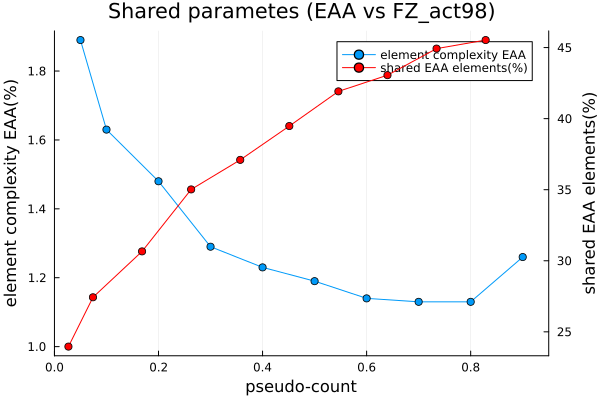

In [20]:
plot(alphas, element_complexity_EAA, title="Shared parametes (EAA vs FZ_act98)", xlabel="pseudo-count", ylabel = "element complexity EAA(%)", label="element complexity EAA", marker=:circle)
plot!([1, 1], [1,1], xlims = [0,0.95], c=:red, label="shared EAA elements(%)", marker=:circle)
plot!(twinx(), alphas, common_elements_wrt_EAA_act, ylabel = "shared EAA elements(%)", color=:red, label="common elements wrt EAA", marker=:circle, legend=:false)
#savefig(joinpath(path_act,"Shared parametes (EAA vs FZ_act98).png"))

#### Decimation:

In [21]:
edge_complexity_FZ_dec = 100
element_complexity_FZ_dec = 2.96


common_edges =         [37.7, 36.03, 36.16, 35.0, 35.88, 37.32, 38.25, 40.75, 44.14, 51.84]
common_edges_wrt_FZ =  [37.7, 36.03, 36.16, 35.0, 35.88, 37.32, 38.25, 40.75, 44.14, 51.84]
common_edges_wrt_EAA = [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]

common_elements_dec =         [0.41, 0.41, 0.42, 0.43, 0.45, 0.49, 0.52, 0.58, 0.66, 0.83]
common_elements_wrt_FZ_dec =  [13.88, 13.69, 14.22, 14.44, 15.3, 16.62, 17.69, 19.72, 22.25, 28.03]
common_elements_wrt_EAA_dec = [21.78, 24.87, 28.41, 33.12, 36.78, 41.46, 46.03, 51.51, 58.3, 65.84];

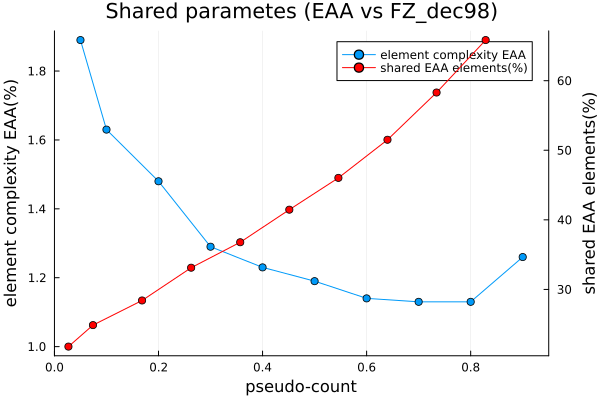

In [22]:
plot(alphas, element_complexity_EAA, title="Shared parametes (EAA vs FZ_dec98)", xlabel="pseudo-count", ylabel = "element complexity EAA(%)", label="element complexity EAA", marker=:circle)
plot!([1, 1], [1,1], xlims = [0,0.95], c=:red, label="shared EAA elements(%)", marker=:circle)
plot!(twinx(), alphas, common_elements_wrt_EAA_dec, ylabel = "shared EAA elements(%)", color=:red, label="common elements wrt EAA", marker=:circle, legend=:false)
#savefig(joinpath(path_dec,"Shared parametes (EAA vs FZ_dec98).png"))

## Comparison of three models:

In [23]:
folder_name = model1 * "_vs_" * model2 * "_vs_" * model3
alignment = "CM_alignment"

rm(joinpath("figures/"* alignment * "/comparison_models/comparison_3_models",folder_name), force=true, recursive=true)
mkdir(joinpath("figures/"* alignment * "/comparison_models/comparison_3_models",folder_name))
path_3_models = joinpath("figures/"* alignment * "/comparison_models/comparison_3_models",folder_name);

In [24]:
n_000, n_100, n_010, n_001, n_110, n_101, n_011, n_111, n_12, n_13, n_23, n_ij, n_ij_12, n_ij_13, n_ij_23,  Jij_common1, Jij_common2, Jij_common3, Jij_12, Jij_13, Jij_23, Jij_123 = count_common_Jij_three_models(Jij1, Jij2, Jij3);
frac_000, frac_100, frac_010, frac_001, frac_110, frac_101, frac_011, frac_111 = round(n_000/Nij_ab_tot * 100, digits=2), round(n_100/Nij_ab_tot * 100, digits=2), round(n_010/Nij_ab_tot * 100, digits=2), round(n_001/Nij_ab_tot * 100, digits=2), round(n_110/Nij_ab_tot * 100, digits=2), round(n_101/Nij_ab_tot * 100, digits=2), round(n_011/Nij_ab_tot * 100, digits=2), round(n_111/Nij_ab_tot * 100, digits=2)
frac_12, frac_13, frac_23 = round(n_12/Nij_ab_tot * 100, digits=2), round(n_13/Nij_ab_tot * 100, digits=2), round(n_23/Nij_ab_tot * 100, digits=2)

complex_edge3 = round(count(!iszero, sum(abs.(Jij3[:,:,i]) for i in 1:size(Jij3, 3)))/Nij_tot*100, digits=2)
complex_element3 = round(count(!iszero, Jij3)/Nij_ab_tot*100, digits=2)

frac_111_1, frac_111_2, frac_111_3 = round(n_111/element_n1 * 100, digits=2), round(n_111/element_n2 * 100, digits=2), round(n_111/element_n3 * 100, digits=2)

frac_edge_111 = round(n_ij/Nij_tot * 100, digits=2)
frac_edge_111_1, frac_edge_111_2, frac_edge_111_3 = round(n_ij/edge_n1 * 100, digits=2), round(n_ij/edge_n2 * 100, digits=2), round(n_ij/edge_n3 * 100, digits=2)
### WRITE ON FILE ################################################################################################################################################
filename = "count_common_Jij"
open(joinpath(path_3_models, filename), "w") do f  
    println("Model 1: ",model1,";    Model 2: ",model2,";    Model 3: ",model3,";")
    write(f,"Model 1: $(model1);    Model 2: $(model2);    Model 3: $(model3);")

    println("______________________________________________________________________________________________________________________________________________________")
    write(f,"\n______________________________________________________________________________________________________________________________________________________")
    println("______________________________________________________________________________________________________________________________________________________")
    write(f,"\n______________________________________________________________________________________________________________________________________________________")
    


    println("Edge Complexity model 1: ",complex_edge1,"%;    Edge Complexity model 2: ",complex_edge2, "%;    Edge Complexity model 3: ",complex_edge3, "%")
    write(f,"Edge Complexity model 1: $(complex_edge1)%;    Edge Complexity model 2: $(complex_edge2)%;    Edge Complexity model 3: $(complex_edge3)%;")

    println("\nElement Complexity model 1: ",complex_element1,"%;    Element Complexity model 2: ",complex_element2, "%;    Element Complexity model 3: ",complex_element3, "%")
    write(f,"\nElement Complexity model 1: $(complex_element1)%;    Element Complexity model 2: $(complex_element2)%;    Element Complexity model 3: $(complex_element3)%;")

    println("______________________________________________________________________________________________________________________________________________________")
    write(f,"\n______________________________________________________________________________________________________________________________________________________")
    
    println("\nCommon Edges: \n",frac_edge_111,"% of the total (L^2);   ", frac_edge_111_1, "% of the nonzeros of model 2;   ", frac_edge_111_2, "% of the nonzeros of model 2;   ", frac_edge_111_3, "% of the nonzeros of model 2")
    write(f,"\nCommon Edges: \n $(frac_edge_111)% of the total;   $(frac_edge_111_1)% of the first model;   $(frac_edge_111_2)% of the second model;   $(frac_edge_111_3)% of the third model")

    println("\nCommon Elements: \n",frac_111 ,"% of the total (L^2*q^2);   ",  frac_111_1, "% of the nonzeros in model 1;   ", frac_111_2, "% of the nonzeros of model 2;   ", frac_111_3, "% of the nonzeros of model 3")
    write(f,"\nCommon Elements: \n $(frac_111)% of the total;   $(frac_111_1)% of the first model;   $(frac_111_2)% of the second model;   $(frac_111_3)% of the third model")

    println("______________________________________________________________________________________________________________________________________________________")
    write(f,"\n______________________________________________________________________________________________________________________________________________________")

    println("\nNumber of cases where    J_1, J_2, J_3 = 1, 1, 1:   ", n_111)
    write(f,"\nNumber of cases where    J_1, J_2, J_3 = 1, 1, 1:   $n_111")

    println("\nNumber of cases where    J_1, J_2, J_3 = 1, 1, 0:   ", n_110)
    write(f,"\nNumber of cases where    J_1, J_2, J_3 = 1, 1, 0:   $n_110")

    println("\nNumber of cases where    J_1, J_2, J_3 = 1, 0, 1:   ", n_101)
    write(f,"\nNumber of cases where    J_1, J_2, J_3 = 1, 0, 1:   $n_101")

    println("\nNumber of cases where    J_1, J_2, J_3 = 0, 1, 1:   ", n_011)
    write(f,"\nNumber of cases where    J_1, J_2, J_3 = 0, 1, 1:   $n_011")

    println("\nNumber of cases where    J_1, J_2, J_3 = 0, 0, 1:   ", n_001)
    write(f,"\nNumber of cases where    J_1, J_2, J_3 = 0, 0, 1:   $n_001")

    println("\nNumber of cases where    J_1, J_2, J_3 = 0, 1, 0:   ", n_010)
    write(f,"\nNumber of cases where    J_1, J_2, J_3 = 0, 1, 0:   $n_010")

    println("\nNumber of cases where    J_1, J_2, J_3 = 1, 0, 0:   ", n_100)
    write(f,"\nNumber of cases where    J_1, J_2, J_3 = 1, 0, 0:   $n_100")

    println("\nNumber of cases where    J_1, J_2, J_3 = 0, 0, 0:   ", n_000)
    write(f,"\nNumber of cases where    J_1, J_2, J_3 = 0, 0, 0:   $n_000")
    println("______________________________________________________________________________________________________________________________________________________")
    write(f,"\n______________________________________________________________________________________________________________________________________________________")
end;

Model 1: EAA_(0.9_0.01_nb1);    Model 2: EAA_(0.9_0.01_nb2);    Model 3: EAA_(0.9_0.01_nb3);
______________________________________________________________________________________________________________________________________________________
______________________________________________________________________________________________________________________________________________________
Edge Complexity model 1: 51.84%;    Edge Complexity model 2: 52.11%;    Edge Complexity model 3: 51.21%

Element Complexity model 1: 1.26%;    Element Complexity model 2: 1.29%;    Element Complexity model 3: 1.25%
______________________________________________________________________________________________________________________________________________________

Common Edges: 
46.01% of the total (L^2);   88.75% of the nonzeros of model 2;   88.3% of the nonzeros of model 2;   89.85% of the nonzeros of model 2

Common Elements: 
0.64% of the total (L^2*q^2);   51.0% of the nonzeros in model 1;   

### Robust Core size:

#### EAA models:

In [88]:
common_elements_3 =     [0.45, 0.42, 0.41, 0.4, 0.4, 0.41, 0.42, 0.45, 0.48, 0.64]
common_elements_wrt_1 = [23.58, 25.88, 27.5, 30.73, 32.14, 34.41, 36.53, 39.29, 42.62, 51.0]
common_elements_wrt_2 = [23.08, 26.17, 29.16, 30.72, 32.64, 34.55, 36.76, 39.74, 42.5, 50.03]
common_elements_wrt_3 = [23.52, 26.61, 28.24, 29.95, 31.15, 34.36, 36.51, 38.35, 43.13, 51.57];
ave_common_elements_wrt = (common_elements_wrt_1 .+ common_elements_wrt_2 .+ common_elements_wrt_3 )./ 3
mom2_common_elements_wrt = (common_elements_wrt_1 .*common_elements_wrt_1 .+ common_elements_wrt_2 .*common_elements_wrt_2 .+ common_elements_wrt_3 .* common_elements_wrt_3 )./ 3
σ_common_elements_wrt = sqrt.(mom2_common_elements_wrt .- ave_common_elements_wrt.*ave_common_elements_wrt)

plot(alphas, element_complexity_EAA, title="Three EAA models comparison", xlabel="pseudo-count", ylabel = "element complexity EAA(%)", label="element complexity EAA(%)", marker=:circle)
plot!([1, 1], [1,1], xlims = [0,0.99], c=:red, label="shared EAA elements(%)", marker=:circle)
plot!(twinx(), alphas, ave_common_elements_wrt, yerr=σ_common_elements_wrt, ylabel = "shared EAA elements(%)", color=:red, label="common elements wrt EAA", marker=:circle, legend=:false)
folder_name = "3_EAA_comparison"
path_EAA = joinpath("figures/"* alignment * "/comparison_models/comparison_3_models",folder_name);
#savefig(joinpath(path_EAA,"Shared parametes (3 EAA vs pseudocount).png"));

## Is EAA core robust with FZ models?

In [81]:
comm_edges = zeros(length(alphas))
comm_elements = zeros(length(alphas))

frac_comm_edges = zeros(length(alphas))
frac_comm_elements = zeros(length(alphas))

complex_edge = zeros(length(alphas))
complex_element = zeros(length(alphas))

core_conserved = zeros(length(alphas))

## SELECT MODEL FZ ############################################################################
folder_zamponi4 = "new_algo"
tipo4 = "act" # "dec" 
sparsity4 = "0.90"
model_zamponi4 = "FZ_Parameters_conv_" * tipo4 * "CM"* sparsity4 * ".dat"
model4 = "FZ_" * model_zamponi4[20:end-4];

filepath4 = "../saved_models/Francesco_Zamponi/"* folder_zamponi4 * "/" * model_zamponi4;
Jij4, h4 = read_model(filepath4);
edge_n4, element_n4 = count(!iszero, sum(abs.(Jij4[:,:,i]) for i in 1:size(Jij4, 3))), count(!iszero, Jij4)

idx = 0
for α in alphas
    idx += 1
    println("idx=", idx)
    ## SELECT MODEL 1 ############################################################################
    method = "cumulative"
    test = "main_test"
    fraction = 0.3
    stop = 0.9
    α = α 
    init_pseudo_count = 0.01
    notebook1 = 1
    model1 = "EAA_(" * string(α) * "_" * string(init_pseudo_count) * "_" * "nb1)";
    model2 = "EAA_(" * string(α) * "_" * string(init_pseudo_count) * "_" * "nb2)";
    model3 = "EAA_(" * string(α) * "_" * string(init_pseudo_count) * "_" * "nb3)";

    folder = "../training/" * alignment * "/" * method * "/" * test * "/"
    path1 = folder*method*string(fraction)*"_stop="*string(stop) *"_reg="*string(α) *"_nb1"
    path2 = folder*method*string(fraction)*"_stop="*string(stop) *"_reg="*string(α) *"_nb2"
    path3 = folder*method*string(fraction)*"_stop="*string(stop) *"_reg="*string(α) *"_nb3"

    h1, h2, h3 = JLD.load(path1* "/h.jld")["data"], JLD.load(path2* "/h.jld")["data"], JLD.load(path3* "/h.jld")["data"]
    Jij1, Jij2, Jij3 = JLD.load(path1* "/Jij.jld")["data"], JLD.load(path2* "/Jij.jld")["data"], JLD.load(path3* "/Jij.jld")["data"]
    iteration1, iteration2, iteration3 = open(path1* "/iterations.txt", "r"), open(path2* "/iterations.txt", "r"), open(path3* "/iterations.txt", "r")
    #data1 = parse.(Float64, split(readlines(iteration1)[end], " ")[1:end-1])
    edge_n1, element_n1 = count(!iszero, sum(abs.(Jij1[:,:,i]) for i in 1:size(Jij1, 3))), count(!iszero, Jij1)
    edge_n2, element_n2 = count(!iszero, sum(abs.(Jij2[:,:,i]) for i in 1:size(Jij2, 3))), count(!iszero, Jij2)
    edge_n3, element_n3 = count(!iszero, sum(abs.(Jij3[:,:,i]) for i in 1:size(Jij3, 3))), count(!iszero, Jij3)
    
## FIND CORE 1,2,3 ######################################################################################################################################################
    n_000, n_100, n_010, n_001, n_110, n_101, n_011, n_111, n_12, n_13, n_23, n_ij, n_ij_12, n_ij_13, n_ij_23,  Jij_common1, Jij_common2, Jij_common3, Jij_12, Jij_13, Jij_23, Jij_123 = count_common_Jij_three_models(Jij1, Jij2, Jij3);
## CROSS IT WITH FZ MODEL ######################################################################################################################################################
    
    ave_n_edges = (edge_n1 + edge_n2 + edge_n3)/3
    ave_n_elements = (element_n1 + element_n2 + element_n3)/3
    
    # count edges/elements in common
    comm_edges[idx], comm_elements[idx], n_01, n_10, n_00, Jij_common1, Jij_common2 = count_common_Jij(Jij_123, Jij4);
    frac_comm_edges[idx] = round(comm_edges[idx]/Nij_tot * 100, digits=2)
    frac_comm_edges[idx] = round(comm_elements[idx]/Nij_ab_tot * 100, digits=2)

    # compute the complexity
    complex_edge[idx] = round(count(!iszero, sum(abs.(Jij_common1) for i in 1:size(Jij_common1, 3)))/ave_n_edges*100, digits=2)
    complex_element[idx] = round(count(!iszero, Jij_common1)/ave_n_elements*100, digits=2)

    core_conserved[idx] = round(comm_elements[idx]/n_111 * 100, digits=2)
end

idx=1
idx=2
idx=3
idx=4
idx=5
idx=6
idx=7
idx=8
idx=9
idx=10


In [82]:
## CREATE FOLDER #####################################################################################################################################################
model = "EAA";
folder_name = model*"_vs_"*model4
alignment = "CM_alignment"

rm(joinpath("figures/"* alignment * "/comparison_models/comparison_3_models/robust_core",folder_name), force=true, recursive=true)
mkdir(joinpath("figures/"* alignment * "/comparison_models/comparison_3_models//robust_core",folder_name))
path_comp = joinpath("figures/"* alignment * "/comparison_models/comparison_3_models//robust_core",folder_name);

In [83]:
plot(alphas, complex_element, title="EAA vs "*model4, xlabel="pseudo-count", ylabel = "core size w.r.t. EAA(%)", label = "core size wrt EAA parameters", marker=:circle)
plot!([1, 1], [1,1], xlims = [0,0.99], c=:red, label="EAA element complexity(%)", marker=:circle)
plot!(twinx(), alphas, element_complexity_EAA, ylabel = "EAA element complexity(%)", color=:red, label="EAA element complexity(%)", marker=:circle, legend=:false)
savefig(joinpath(path_comp,"Core size wrt EAA (EAA vs "*model4*").png"));

In [84]:
plot(alphas, core_conserved, title="EAA vs "*model4, xlabel="pseudo-count", ylabel = "conserved core size(%)", label = "conserved core size(%)", marker=:circle)
plot!([1, 1], [1,1], xlims = [0,0.99], c=:red, label="EAA element complexity(%)", marker=:circle)
plot!(twinx(), alphas, element_complexity_EAA, ylabel = "EAA element complexity(%)", color=:red, label="EAA element complexity(%)", marker=:circle, legend=:false)
savefig(joinpath(path_comp,"Conserved Core size (EAA vs "*model4*").png"));

In [138]:
include("../src/FCSeqTools.jl");
include("../src/functions.jl");

scatter_flag = false;

In [129]:
nat_MSA, nat_re, nat_E = read_fasta("paper_data/nat.faa", 0.2);
gen_MSA, gen_re, gen_E = read_fasta("paper_data/gen.faa", 0.2);
dms_MSA, dms_re, dms_E = read_fasta("paper_data/dms.faa", 0.2);

size(nat_MSA, 1)

1130

In [131]:
d, seq_id = distance_from_ref_seq(nat_MSA[1,:], nat_MSA)

1130


([0.0, 71.0, 77.0, 7.0, 69.0, 10.0, 9.0, 68.0, 19.0, 68.0  …  85.0, 87.0, 87.0, 88.0, 88.0, 89.0, 88.0, 87.0, 87.0, 88.0], [1.0, 0.2604166666666667, 0.19791666666666666, 0.9270833333333334, 0.28125, 0.8958333333333334, 0.90625, 0.2916666666666667, 0.8020833333333334, 0.2916666666666667  …  0.11458333333333333, 0.09375, 0.09375, 0.08333333333333333, 0.08333333333333333, 0.07291666666666667, 0.08333333333333333, 0.09375, 0.09375, 0.08333333333333333])

In [132]:
println(seq_id)

[1.0, 0.2604166666666667, 0.19791666666666666, 0.9270833333333334, 0.28125, 0.8958333333333334, 0.90625, 0.2916666666666667, 0.8020833333333334, 0.2916666666666667, 0.28125, 0.78125, 0.2604166666666667, 0.7395833333333334, 0.7291666666666666, 0.6770833333333334, 0.7291666666666666, 0.71875, 0.71875, 0.25, 0.23958333333333334, 0.7083333333333334, 0.6979166666666666, 0.21875, 0.6770833333333334, 0.1875, 0.6666666666666666, 0.6458333333333334, 0.6458333333333334, 0.65625, 0.59375, 0.625, 0.2708333333333333, 0.2708333333333333, 0.2708333333333333, 0.2916666666666667, 0.2708333333333333, 0.21875, 0.25, 0.2708333333333333, 0.2708333333333333, 0.2708333333333333, 0.25, 0.2708333333333333, 0.23958333333333334, 0.2708333333333333, 0.2708333333333333, 0.21875, 0.2708333333333333, 0.22916666666666666, 0.2604166666666667, 0.23958333333333334, 0.2604166666666667, 0.3125, 0.2604166666666667, 0.25, 0.2708333333333333, 0.3125, 0.2708333333333333, 0.3125, 0.1875, 0.17708333333333334, 0.1875, 0.1875, 0.

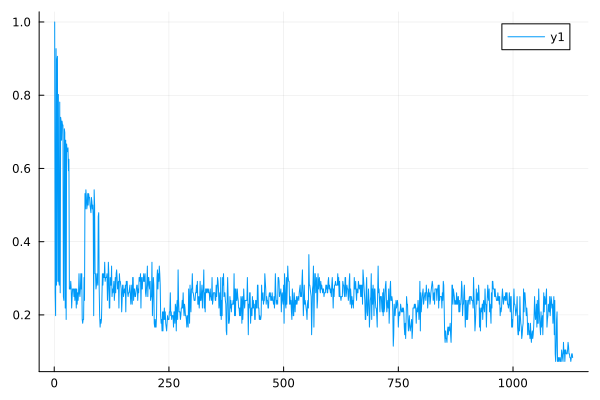

In [133]:
plot(seq_id)


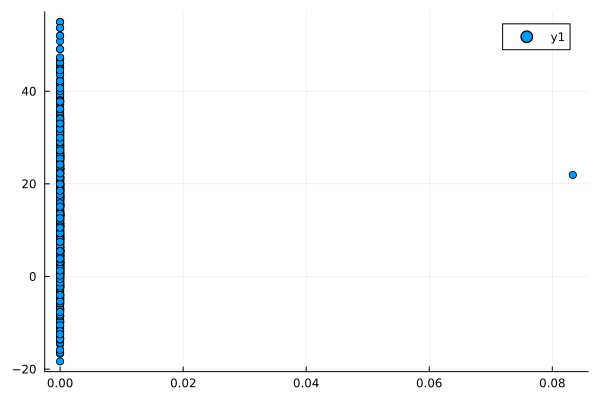

In [143]:
scatter(seq_id, nat_E)

In [157]:
d, seq_id = sequence_identity(nat_MSA, gen_MSA)

([34.0, 53.0, 40.0, 34.0, 53.0, 31.0, 59.0, 30.0, 56.0, 45.0  …  16.0, 10.0, 11.0, 8.0, 14.0, 10.0, 10.0, 14.0, 17.0, 25.0], [0.6458333333333333, 0.44791666666666663, 0.5833333333333333, 0.6458333333333333, 0.44791666666666663, 0.6770833333333333, 0.38541666666666663, 0.6875, 0.41666666666666663, 0.53125  …  0.8333333333333334, 0.8958333333333334, 0.8854166666666666, 0.9166666666666666, 0.8541666666666666, 0.8958333333333334, 0.8958333333333334, 0.8541666666666666, 0.8229166666666666, 0.7395833333333333])

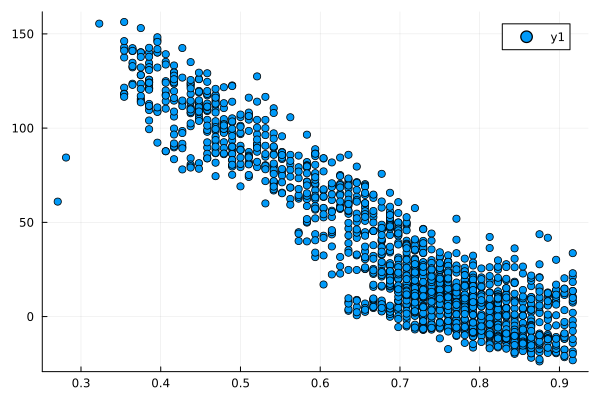

In [159]:
scatter(seq_id, gen_E)

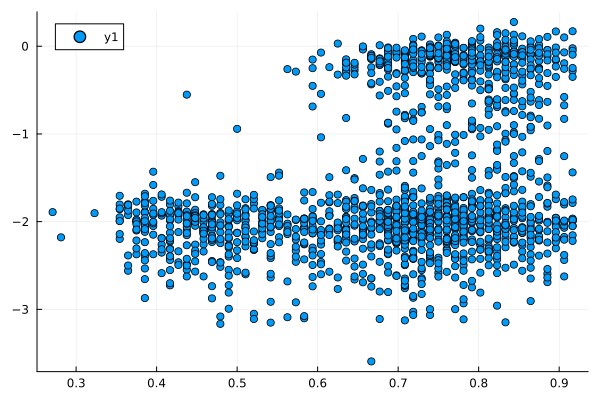

In [160]:
scatter(seq_id, gen_re)